# Encode text data

In [1]:
import pickle
import numpy as np
import pandas as pd

In [55]:
with open("../data/preprocessed_questions.pkl", "rb") as f:
    preprocessed_questions = pickle.load(f)

In [3]:
# mask = preprocessed_questions["text_length_lemma"] > 0
# preprocessed_questions = preprocessed_questions.loc[mask, :]

In [56]:
tokenised_sentences = preprocessed_questions["clean_text_lemma"].str.split()

## FastText

In [12]:
from gensim.models import FastText
model = FastText(tokenised_sentences.tolist()[:100], vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [99]:
def get_document_vector(doc, wv):
    """
    Remove out-of-vocabulary words.
    Create document vectors by averaging word vectors.
    """
    if not doc:
        return model.wv.__getitem__("")
    return np.mean(wv.__getitem__(doc), axis=0).reshape(1, -1)

In [68]:
# temp_qids = preprocessed_questions[preprocessed_questions["text_length_lemma"] == 0].index

In [69]:
# raw_data = pd.read_csv("../data/train.csv", index_col=0)

In [70]:
# temp_qids.tolist()

In [71]:
# mask = raw_data["qid1"].isin(temp_qids) | raw_data["qid2"].isin(temp_qids)
# raw_data.loc[mask & raw_data["is_duplicate"] == 1].index.tolist()

In [105]:
_in = tokenised_sentences.iloc[:10]
_out = _in.apply(lambda x: get_document_vector(x, model.wv))

In [106]:
from sklearn import metrics

In [110]:
t = np.concatenate(_out.tolist(), axis=0)

In [121]:
sim = pd.DataFrame(metrics.pairwise_distances(t), index=_out.index, columns=_out.index)

In [123]:
raw_data.iloc[:10].apply(lambda x: sim.loc[x["qid1"], x["qid2"]])

KeyError: 'qid1'

## Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_vectorizer = CountVectorizer()
in_data = preprocessed_questions['clean_text_lemma'].iloc[:100]
bow_encoded_questions = bow_vectorizer.fit_transform(in_data)

In [26]:
from sklearn.metrics import pairwise_distances

In [27]:
d = pairwise_distances(bow_encoded_questions)

In [28]:
import matplotlib.pyplot as plt

In [30]:
pd.DataFrame(d, index=in_data.index, columns=in_data.index)

qid,1,3,5,7,9,11,13,15,17,19,...,181,183,185,187,189,191,193,195,197,199
qid,,,,,,,,,,,,,,,,,,,,,
1,0.000000,3.741657,3.872983,3.464102,4.358899,4.358899,3.316625,3.316625,3.316625,3.872983,...,3.872983,4.123106,3.605551,3.316625,3.464102,3.316625,3.741657,3.464102,5.099020,3.605551
3,3.741657,0.000000,3.316625,2.828427,3.872983,3.872983,2.645751,2.645751,2.645751,3.316625,...,3.316625,3.605551,3.000000,2.645751,2.828427,2.645751,3.162278,2.828427,4.690416,3.000000
5,3.872983,3.316625,0.000000,3.000000,4.000000,4.000000,2.828427,2.828427,2.828427,3.464102,...,3.464102,3.741657,3.162278,2.828427,3.000000,2.828427,3.316625,3.000000,4.795832,3.162278
7,3.464102,2.828427,3.000000,0.000000,3.605551,3.605551,2.236068,2.236068,2.236068,3.000000,...,3.000000,3.316625,2.645751,2.236068,2.449490,2.236068,2.828427,2.449490,4.472136,2.645751
9,4.358899,3.872983,4.000000,3.605551,0.000000,4.472136,3.464102,3.464102,3.464102,4.000000,...,4.000000,4.242641,3.741657,3.464102,3.605551,3.464102,3.872983,3.605551,5.196152,3.741657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,3.316625,2.645751,2.828427,2.236068,3.464102,3.464102,2.000000,2.000000,2.000000,2.828427,...,2.828427,3.162278,2.449490,2.000000,2.236068,0.000000,2.645751,2.236068,4.358899,2.449490
193,3.741657,3.162278,3.316625,2.828427,3.872983,3.872983,2.645751,2.645751,2.645751,3.316625,...,3.316625,3.605551,3.000000,2.645751,2.828427,2.645751,0.000000,2.828427,4.690416,3.000000
195,3.464102,2.828427,3.000000,2.449490,3.605551,3.605551,2.236068,2.236068,2.236068,3.000000,...,3.000000,3.316625,2.645751,2.236068,2.449490,2.236068,2.828427,0.000000,4.472136,2.645751


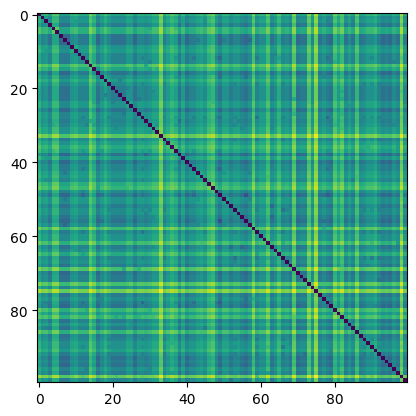

In [21]:
plt.imshow(d)

In [32]:
with open("../embeddings/w2v_model.pkl", "rb") as f:
    emb = pickle.load(f)

In [40]:
emb.

1

In [16]:
bow_encoded_questions = {k: v for k, v in zip(preprocessed_questions.index, bow_encoded_questions)}

In [27]:
with open("bow_embeddings.pkl", "wb") as f:
    pickle.dump(bow_encoded_questions, f)

## TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_encoded_questions = tfidf_vectorizer.fit_transform(preprocessed_questions['clean_text_lemma'])

In [20]:
tfidf_encoded_questions = {k: v for k, v in zip(preprocessed_questions.index, tfidf_encoded_questions)}

In [21]:
with open("tfidf_embeddings.pkl", "wb") as f:
    pickle.dump(tfidf_encoded_questions, f)

## Word2Vec

In [5]:
from gensim.models import Word2Vec

In [23]:
w2v_model = Word2Vec(list(tokenised_sentences.values()), vector_size=300, min_count=1)

In [24]:
def get_document_vector(doc, wv):
    """
    Remove out-of-vocabulary words.
    Create document vectors by averaging word vectors.
    """
    vocab_tokens = [word for word in doc if word in wv.index_to_key]
    return np.mean(wv.__getitem__(vocab_tokens), axis=0)

In [25]:
w2v_encoded_questions = {k: get_document_vector(v, w2v_model.wv) for k, v in tokenised_sentences.items()}

In [26]:
with open("w2v_embeddings.pkl", "wb") as f:
    pickle.dump(w2v_encoded_questions, f)

## Glove

In [28]:
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [29]:
wv = api.load('glove-wiki-gigaword-50')                    # load Embeddings (download)

[==================================================] 100.0% 66.0/66.0MB downloaded


In [31]:
# glove_encoded_questions = {k: get_document_vector(v, wv) for k, v in tokenised_sentences.items()}